In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import convolve2d

plt.rcParams['figure.figsize'] = [8, 6]

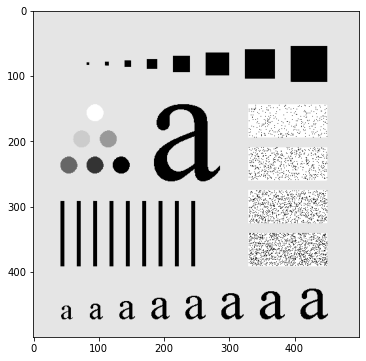

In [2]:
img = cv2.imread("../images/Fig0333(a)(test_pattern_blurring_orig).tif")

plt.imshow(img)

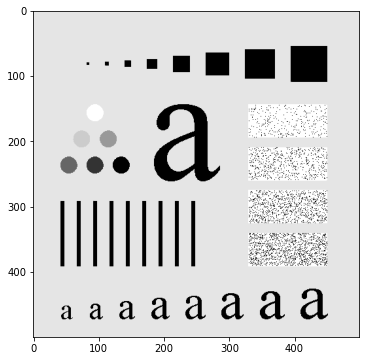

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")

## box filter using numpy 

In [4]:
np.ones((3,3)) * (1/9)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

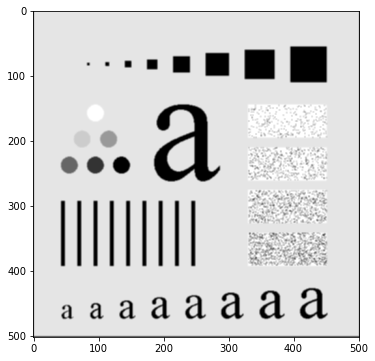

In [5]:
kernel = np.ones((3,3)) / 9

output_3_3 = convolve2d(gray, kernel)

plt.imshow(output_3_3, cmap="gray")

### Box kernel using different kernel sizes

In [6]:
kernel_3 = np.ones((3,3)) / 9
kernel_11 = np.ones((11,11)) / 121
kernel_21 = np.ones((21,21)) / (21^2)


output_3 = convolve2d(gray, kernel_3)
output_11 = convolve2d(gray, kernel_11)
output_21 = convolve2d(gray, kernel_21)

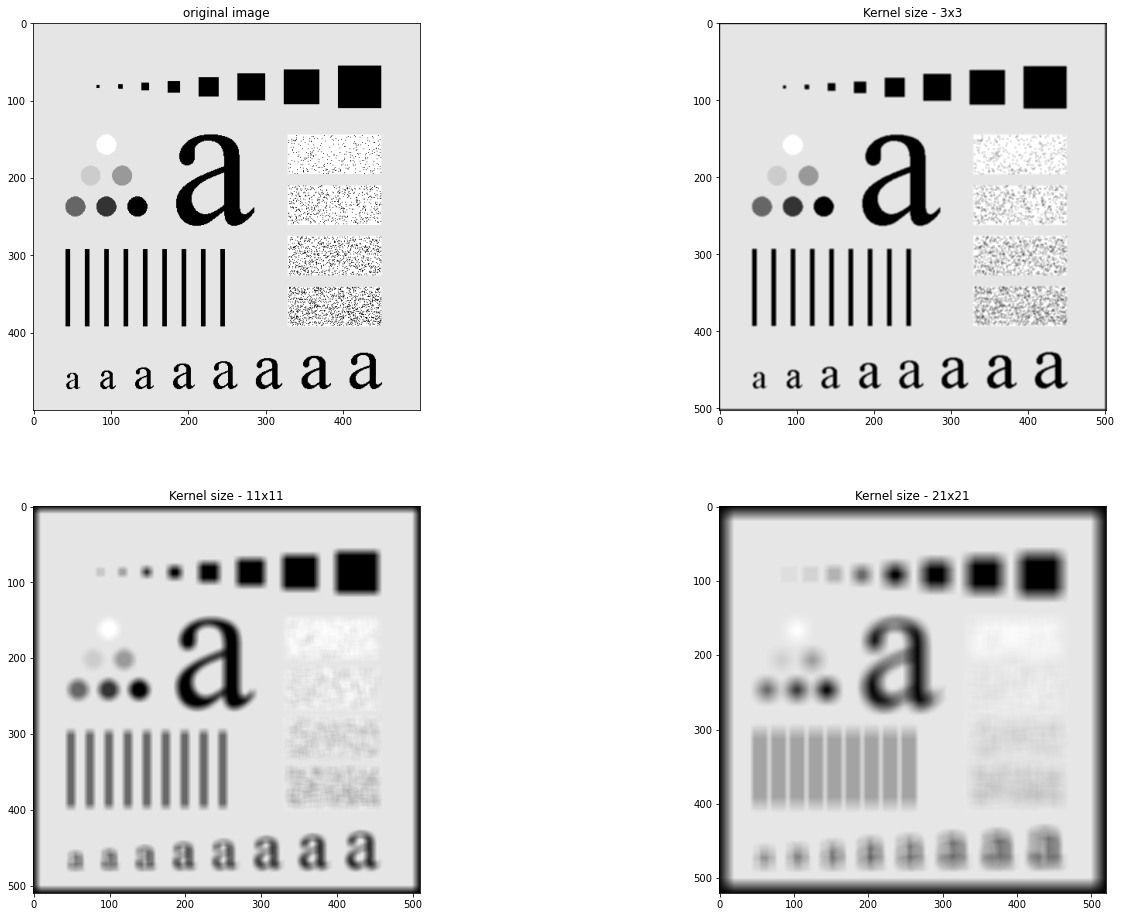

In [7]:
plt.figure(figsize = (24,16))

plt.subplot(221)
plt.imshow(gray, cmap="gray"); plt.title("original image")

plt.subplot(222)
plt.imshow(output_3, cmap="gray"); plt.title("Kernel size - 3x3")

plt.subplot(223)
plt.imshow(output_11, cmap="gray"); plt.title("Kernel size - 11x11")

plt.subplot(224)
plt.imshow(output_21, cmap="gray"); plt.title("Kernel size - 21x21")

plt.subplots_adjust(wspace=0.05, hspace=0.25)


### Observations -

- As the kernel size increases, it starts having dark borders. 

## Box kernel using cv2 

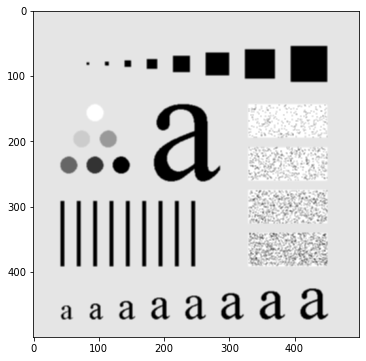

In [8]:
# using cv2 blur 

blurred_3 = cv2.blur(gray, (3,3))

plt.imshow(blurred_3, cmap="gray")

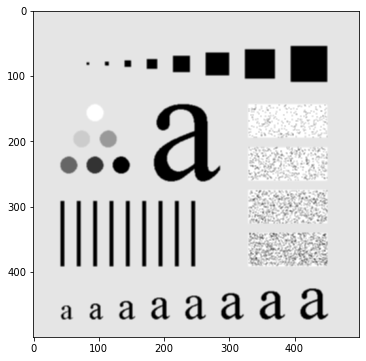

In [9]:
# using box filter 

blurred_3 = cv2.boxFilter(gray, ksize=(3,3), ddepth=-1, normalize=True)

plt.imshow(blurred_3, cmap="gray")

## Gaussian blurring 

- Performs weigheted average. 
- Pixels close to center have more weight, and it decreases away from center. 
- It is  circularly symmetric kernels

In [10]:
kernel_size = 21  
sigma = 3.5      
gaussian_kernel_1 = cv2.getGaussianKernel(kernel_size, sigma)

# To create a 2D Gaussian kernel, you can use the outer product
gaussian_kernel_1 = np.outer(gaussian_kernel_1, gaussian_kernel_1)

# Apply the Gaussian kernel using convolution
blurred_image_1 = cv2.filter2D(gray, -1, gaussian_kernel_1)

In [11]:
kernel_size = 43  
sigma = 7      
gaussian_kernel_2 = cv2.getGaussianKernel(kernel_size, sigma)

# To create a 2D Gaussian kernel, you can use the outer product
gaussian_kernel_2 = np.outer(gaussian_kernel_2, gaussian_kernel_2)

# Apply the Gaussian kernel using convolution
blurred_image_2 = cv2.filter2D(gray, -1, gaussian_kernel_2)

Text(0.5, 1.0, 'ksize = 43x43 with sigma=7')

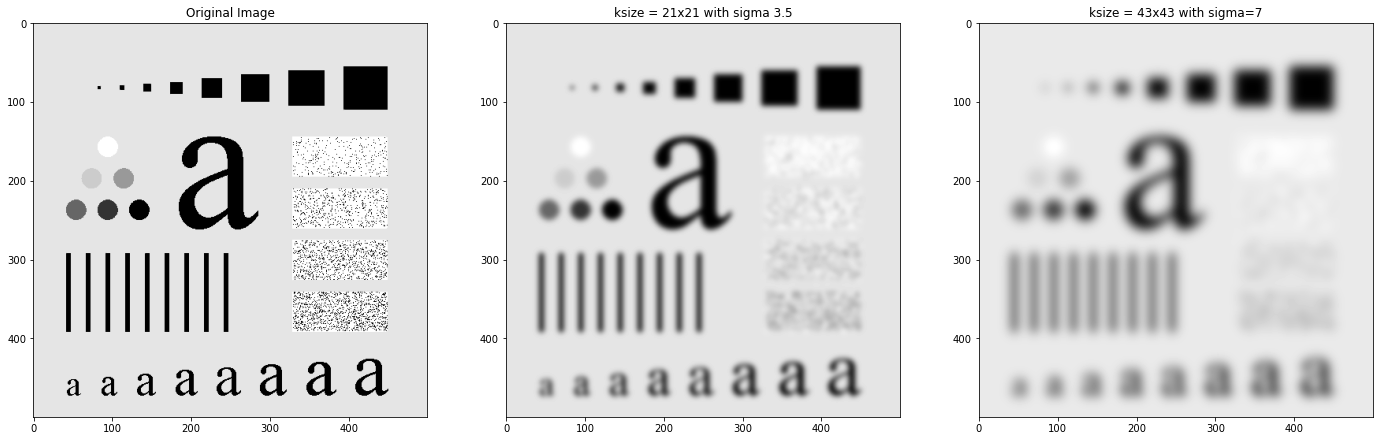

In [12]:
plt.figure(figsize=(24,8))

plt.subplot(131)
plt.imshow(gray, cmap="gray"); plt.title("Original Image")

plt.subplot(132)
plt.imshow(blurred_image_1, cmap="gray"); plt.title("ksize = 21x21 with sigma 3.5")

plt.subplot(133)
plt.imshow(blurred_image_2, cmap="gray"); plt.title("ksize = 43x43 with sigma=7")

## Obersvation - 

In Gaussian kernel, for a given sigma, increasing the ksize by (6*sigma, 6*sigma) doesn't cause any change in results. 



In [13]:
kernel_size = 43  
sigma = 7      
gaussian_kernel_2 = cv2.getGaussianKernel(kernel_size, sigma)

# To create a 2D Gaussian kernel, you can use the outer product
gaussian_kernel_2 = np.outer(gaussian_kernel_2, gaussian_kernel_2)

# Apply the Gaussian kernel using convolution
blurred_image_2 = cv2.filter2D(gray, -1, gaussian_kernel_2)

kernel_size = 85  
sigma = 7      
gaussian_kernel_3 = cv2.getGaussianKernel(kernel_size, sigma)

# To create a 2D Gaussian kernel, you can use the outer product
gaussian_kernel_3 = np.outer(gaussian_kernel_3, gaussian_kernel_3)

# Apply the Gaussian kernel using convolution
blurred_image_3 = cv2.filter2D(gray, -1, gaussian_kernel_3)

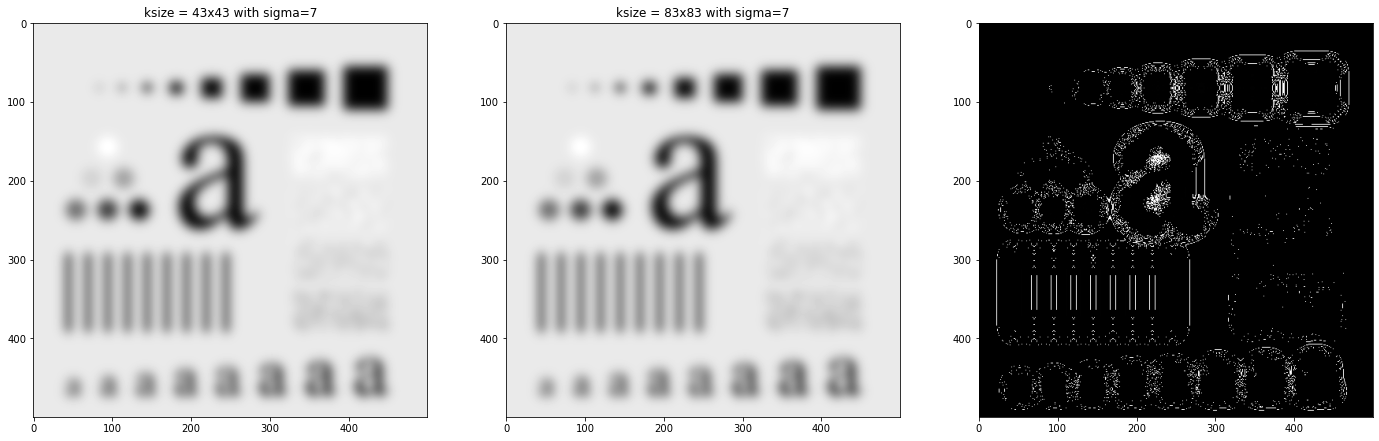

In [22]:
plt.figure(figsize=(24,8))

plt.subplot(131)
plt.imshow(blurred_image_2, cmap="gray"); plt.title("ksize = 43x43 with sigma=7")

plt.subplot(132)
plt.imshow(blurred_image_3, cmap="gray"); plt.title("ksize = 83x83 with sigma=7")

plt.subplot(133)
plt.imshow(np.subtract(blurred_image_3, blurred_image_2), vmin=0, vmax=255, cmap="gray")

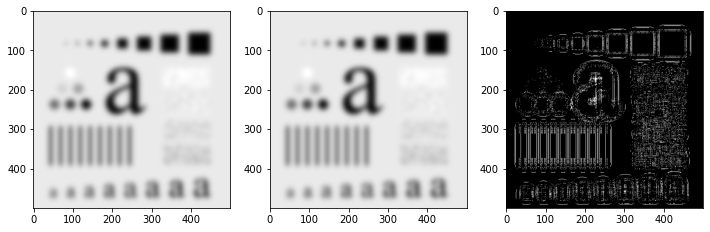

In [25]:
# using gaussian blur 

plt.figure(figsize = (12,8))

blur_image_1 = cv2.GaussianBlur(gray, (43,43), sigmaX=7)

blur_image_2 = cv2.GaussianBlur(gray, (83,83), sigmaX=7)

plt.subplot(131); plt.imshow(blur_image_1, cmap="gray")

plt.subplot(132); plt.imshow(blur_image_2, cmap="gray")

plt.subplot(133); plt.imshow(np.subtract(blur_image_2,blur_image_1), cmap="gray")